## outline & summary

- q-learning => DQN（Deep Q Learning network)
- q_learning base q-table
    - state 需要是/处理成离散的（discrete）
    - q-table：行是state，列是action；
    - $Q(s,a)$：动作价值（value），不是概率分布；
        - $Q(s_t,a_t)$是在时刻 $t$，状态 $s_t$下采取动作 $a_t$ 时获得的折扣奖励总和（discounted total reward）
            - 未来的价值折现到现在；
    - image（pixels） as a state，状态变量的数量非常之大；
- dqn：nn(state) => action value，
    - q table => q function（**拟合/回归**，state vector 与 action value 的关系） 
    - 输入输出：
        - 输入（input）：state vector;
            - cartpole：4d vector（位置，速度，角度，和角速度），甚至都需要care其semantic meaning；
        - 输出：action space value，$Q(s_t,a_t)$
            - shape：action space size；
            - CartPole：2d（left/right）

## DQN

$$
\begin{split}
&Q(s_t,a_t) = Q(s_t,a_t) + \eta\cdot (R_{t+1}+\gamma \max_a Q(s_{t+1},a)-Q(s_t,a_t))\\
&Q(s_t,a_t) = R_{t+1}+\gamma\cdot \max_aQ(s_{t+1},a)
\end{split}
$$

- iteration algorithm
- temporal difference error（TD）: $R_{t+1}+\gamma\cdot \max_aQ(s_t,a) - Q(s_t,a_t)$
- learning objective：
    - MES（square loss）: $E(s_t,a_t)=\left(R_{t+1}+\gamma\max_aQ(s_{t+1},a)-Q(s_t,a_t)\right)^2$

### 几个核心技术

- experience replay（经验回放）
    - 不像 q-table 的 q-learning，每一步都学习（update）该步的内容（experience）
        - 对于 q-table 而言，每一步（step）都学习该步的内容，神经网络连续地学习时间上相关性高的内容（事实上，时间 $t$ 的学习内容，和时间 $t+1$ 的学习内容非常相似，这样的话，收敛就会很慢；
    - 而是将每一步（step）的内容存储在经验池（experience pool）并随机从经验池中提取内容（replay，回放）让NN学习；
        - 也是一种批次化（batch），使用经验池中的多个步骤的经验；

- loss function 使用 huber 而不是 square loss
    - 误差很大时（$|\delta|>1$），平方误差会导致误差函数的输出过大，导致学习难以稳定

$$
\mathcal L(\delta)=\begin{cases}
\frac12\delta^2,  &\quad |\delta|\leq 1,\\
|\delta|-\frac12, &\quad |\delta|\gt 1
\end{cases}
$$

In [5]:
from IPython.display import Image

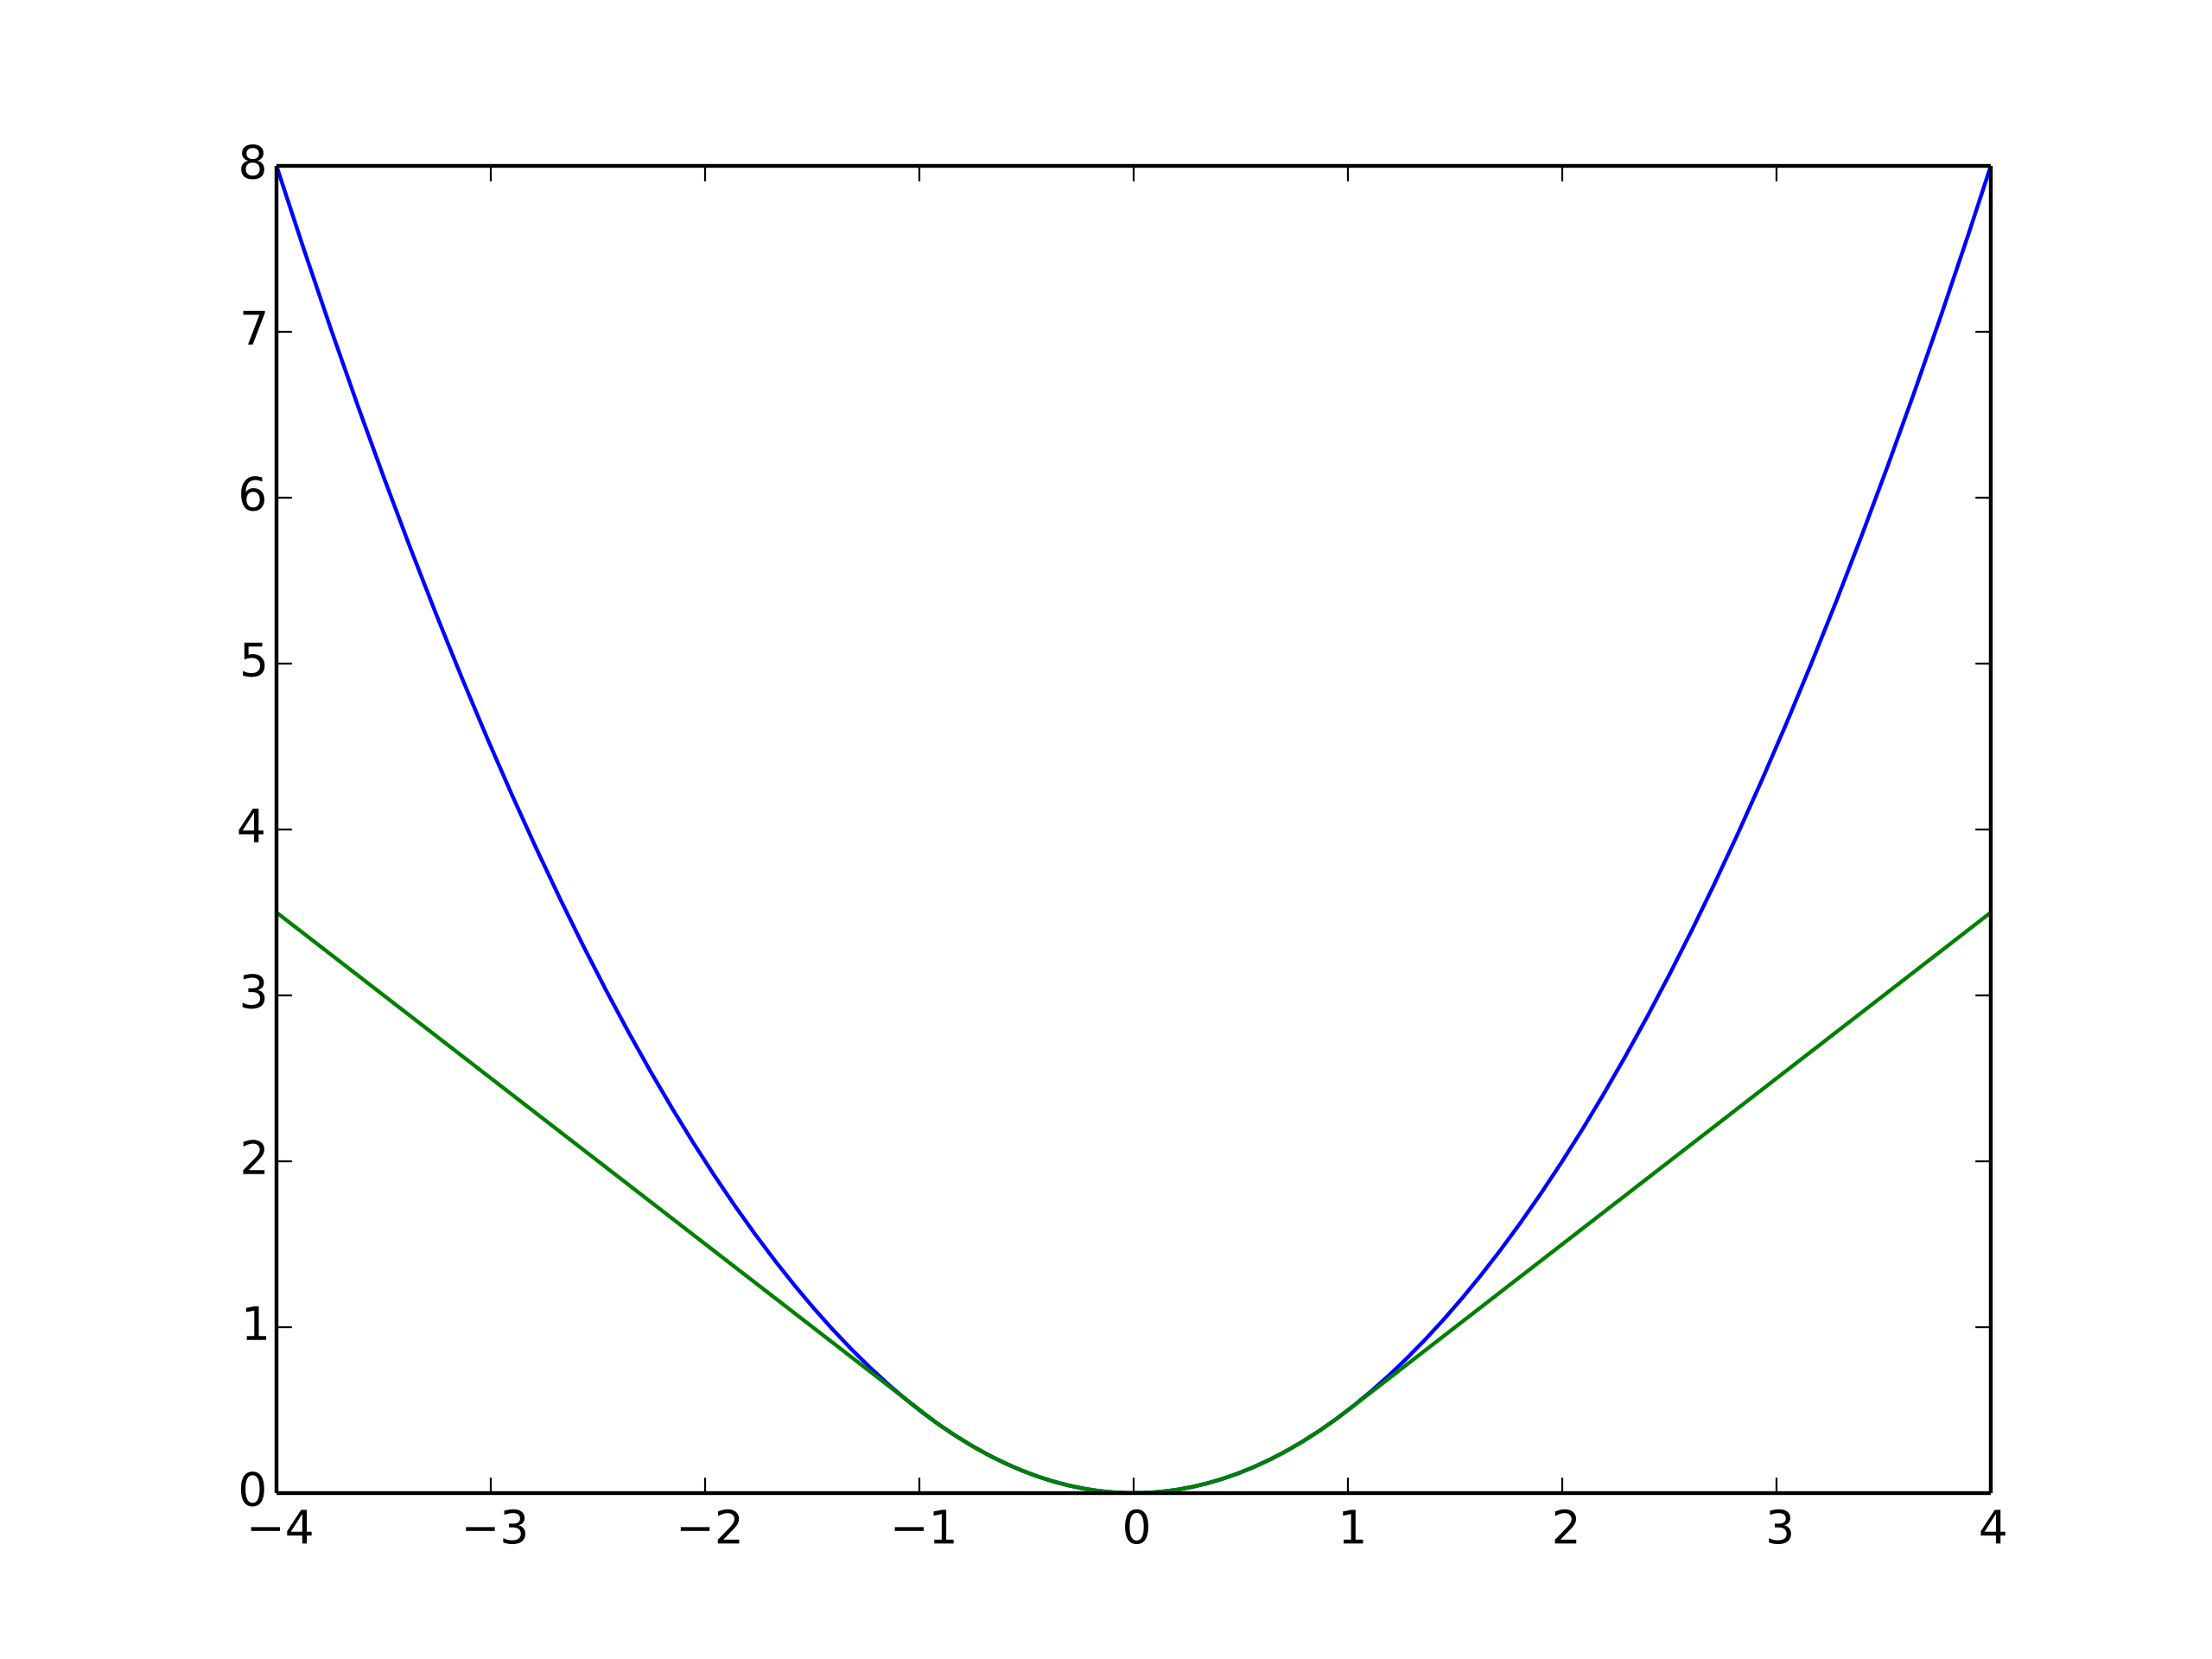

In [9]:
Image('./imgs/Huber_loss.svg.png', width=600, height=450)

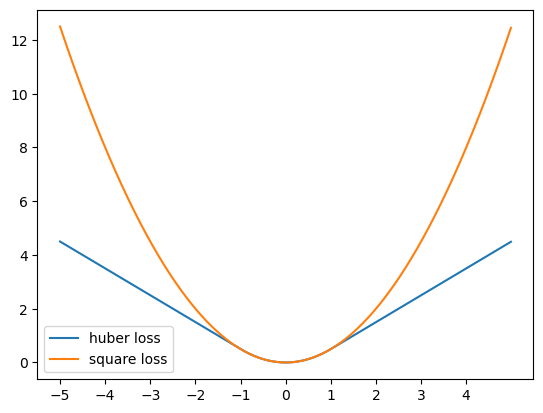

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def huber_loss(delta, beta=1):
    if np.abs(delta) <= beta:
        return 0.5*delta**2/beta
    return abs(delta) - 0.5*beta

def square_loss(delta):
    return 0.5*delta**2

deltas = np.arange(-5, 5, 0.01)
plt.plot(deltas, [huber_loss(delta) for delta in deltas])
plt.plot(deltas, square_loss(deltas))
plt.xticks(np.arange(-5, 5, step=1))
plt.legend(['huber loss', 'square loss'])